In [1]:
!pip3 install torch torchvision torchaudio

  Using cached torchvision-0.14.0-cp39-cp39-win_amd64.whl (1.1 MB)
  Using cached torchaudio-0.13.0-cp39-cp39-win_amd64.whl (2.1 MB)
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.9.2+cu102
    Uninstalling torchvision-0.9.2+cu102:
      Successfully uninstalled torchvision-0.9.2+cu102
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.8.2
    Uninstalling torchaudio-0.8.2:
      Successfully uninstalled torchaudio-0.8.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

%matplotlib inline

In [193]:
# Task 1
# Find the roots of square equation by gradient descent
# x ** 2 - 6 * x + 4 = 0

In [194]:
# возвести в квадрат
# посчитать производную
# надо начать движение от начальной точки в направлении антградиента с заданным шагом
# x = x - lr * grad(x)
# всегда ли сойдемся за приемлемое количество шагов?
# важна ли начальная точка?
# как найти второй корень?
# как влияет ЛР?

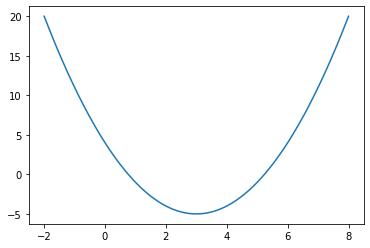

In [2]:
x = np.linspace(-2,8,1000)
y = x**2-6*x+4
plt.plot(x, x**2-6*x+4);

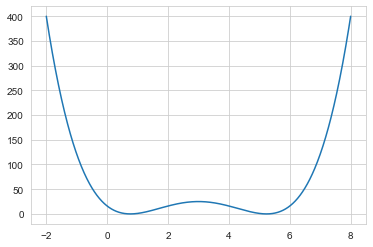

In [196]:
plt.plot(x, x**4 - 12*x**3 + 44*x**2 - 48*x + 16);

In [255]:
def find_min_grad(x_begin, lr):
    if x_begin == 0:
        x_begin = 0.1
    elif x_begin == 3:
        x_begin = 3.1
    x = 0
    precision = 0.00001
    attemp = 0

    x_move = []
    y_move = []

    while (abs(x_begin - x) > precision) and attemp <= 10000:
        attemp += 1
        x = x_begin
        grad = 4*x**3 - 36*x**2 + 88*x - 48
        x_begin = x - grad * lr
        x_move.append(x_begin)
        try:
            y_move.append(4*x_begin**3 - 36*x_begin**2 + 88*x_begin - 48)
        except OverflowError:
            print('Необходимо сделать меньше шаг или выбрать другую точку старта')
            return False

    if attemp == 10001:
        print('Исчерпано количество попыток')
        return False
    else:
        print(f'Найдено значение минимума {round(x_begin,2)}.',
              f'Попыток истрачено {attemp}')
        if x_begin > 3:
            print('Чтобы найти второй корень попробуйте указать значение меньше 3')
        else:
            print('Чтобы найти второй корень попробуйте указать значение больше 3')
        fig, ax = plt.subplots(1, 2, figsize=(14, 6))
        x = np.linspace(-20, 30, 1000)
        ax[0].scatter(x=x_move, y=y_move)
        ax[0].plot(x, 4*x**3 - 36*x**2 + 88*x - 48)
        x = np.linspace(-2,8,1000)
        ax[1].plot(x, x**4 - 12*x**3 + 44*x**2 - 48*x + 16)
        ax[1].scatter(x=x_begin, y = x_begin**4 - 12*x_begin**3 + 44*x_begin**2 - 48 * x_begin + 16)
        ax[1].plot(x, x**2-6*x+4)
        ax[1].set_ylim(-5, 30)
        plt.show()
        return x_begin

Найдено значение минимума 5.24. Попыток истрачено 1519
Чтобы найти второй корень попробуйте указать значение меньше 3


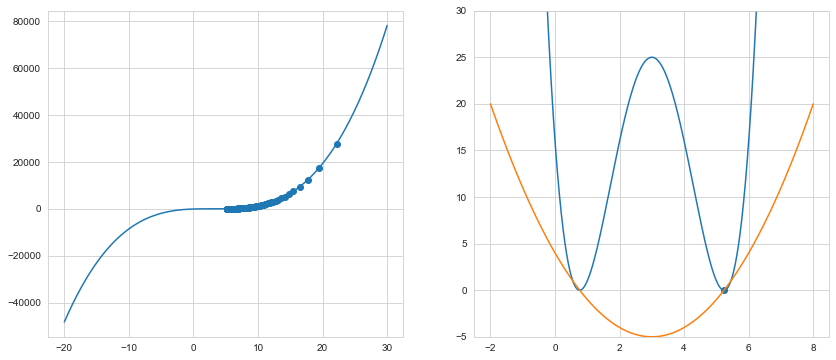

5.23855173802904

In [271]:
find_min_grad(30, 0.0001)

Найдено значение минимума 0.76. Попыток истрачено 200
Чтобы найти второй корень попробуйте указать значение больше 3


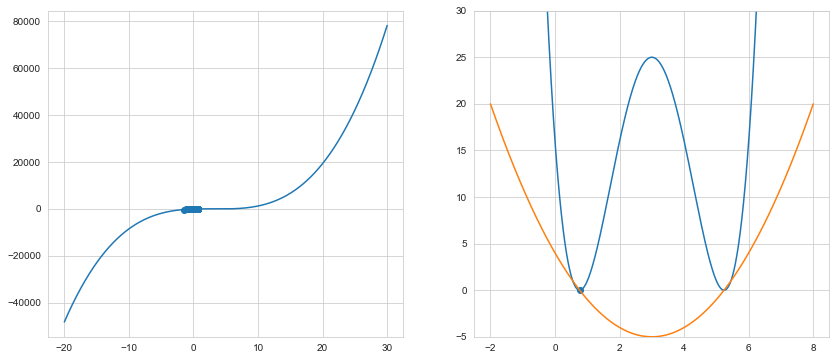

0.7636941628089201

In [274]:
find_min_grad(-10, 0.001)

Краткие выводы:
# всегда ли сойдемся за приемлемое количество шагов?
Если выбрать слишком маленький ЛР, то количество шагов будет слишком большим
# важна ли начальная точка?
Важна, от этого зависит:
1) Какой корень найдется
2) Если точка будет слишком далеко, то необходимо делать маленький ЛР, но тогда будет слишком большое количество попыток
# как найти второй корень?
Попробовать разные точки старта
# как влияет ЛР?
Если поставить слишком маленький ЛР, то количество попыток сильно увеличится, если поставить слишком большой, то можно перескочить минимум и уйти в бесконечный цикл.
Также, в данной задаче чем больше значение точки старта отличается от 0, тем больше необходимо ставить ЛР, иначе получаются слишком большие значения шагов

In [ ]:
# Task 2
# Realize forward and backward pass for linear layer with sigmoid activation